<a href="https://colab.research.google.com/github/Godofin/data_science/blob/main/Pandas_I_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando os nomes**

In [ ]:
import pandas as pd


In [ ]:
feminino = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [ ]:
masculino = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [ ]:
print("A quantidade de nomes : " + str(len(feminino) + len(masculino)))

A quantidade de nomes : 400


In [ ]:
feminino

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [ ]:
masculino

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [ ]:
frames = [feminino, masculino]

In [ ]:
nomes = pd.concat(frames)["nome"].to_frame()

In [ ]:
nomes.sample(5)

,nome
67,HENRIQUE
172,WANDERSON
58,DAVI
11,GABRIEL
15,BRUNO


#**Incluindo ID dos Alunos**

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes["ID_aluno"] = np.random.permutation(total_alunos)+1

In [ ]:
nomes.sample(5)

,nome,ID_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [ ]:
dominios = ["@dominiodoemail.com.br", "@servicodoemail.com"]
nomes['Domínio'] = np.random.choice(dominios, total_alunos)


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.Domínio).str.lower()

In [ ]:
nomes.sample(5)

,nome,ID_aluno,Domínio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


#**Criando a tabela cursos**

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


#**Alterando o index de cursos**

In [ ]:
cursos= cursos.rename(columns={'Nome do curso': 'Nome_do_curso'})

In [ ]:
cursos

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
cursos['id'] = cursos.index +1

In [ ]:
cursos

,Nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#**Matriculando os alunos nos cursos**


In [ ]:
nomes.sample(5)

,nome,ID_aluno,Domínio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [ ]:
nomes

,nome,ID_aluno,Domínio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,5
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


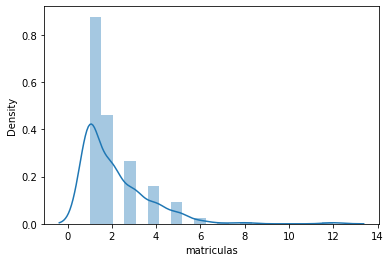

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#**Selecionando Cursos**

In [ ]:
nomes.sample(5)

,nome,ID_aluno,Domínio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [ ]:
todas_matriculas = [ ]
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.ID_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['ID_aluno', "id_curso"])

In [ ]:
matriculas.head()

,ID_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso'])

,ID_aluno,Nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySql
7,56,.NET para web
8,42,Novas integrações com Java
9,60,TDD com Java


In [ ]:
nomes.sample(3)

,nome,ID_aluno,Domínio,email,matriculas
37,EDSON,123,@servicodoemail.com,edson@servicodoemail.com,1
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8
192,ZILDA,237,@servicodoemail.com,zilda@servicodoemail.com,1


In [ ]:
cursos.head()

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,ID_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [ ]:
matriculas_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso'])
matriculas_curso

,ID_aluno,Nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySql
7,56,.NET para web
8,42,Novas integrações com Java
9,60,TDD com Java


#**Saída em diferentes formatos**

In [ ]:
matriculas_curso.head()

,ID_aluno,Nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python


In [ ]:
matriculas_curso.to_csv('Matriculas_por_curso.csv', index= False)

In [ ]:
pd.read_csv("Matriculas_por_curso.csv")

,ID_aluno,Nome_do_curso
0,24,Lógica de programação
1,52,Java para Web
2,54,C# para Web
3,51,Ruby on Rails
4,3,Cursos de Python
5,32,PHP com MySql
6,56,.NET para web
7,42,Novas integrações com Java
8,60,TDD com Java
9,68,Código limpo com C#


In [ ]:
#json
matriculas_json = matriculas.to_json()

In [ ]:
matriculas_json

'{"ID_aluno":{"0":235,"1":43,"2":304,"3":304,"4":304,"5":304,"6":304,"7":156,"8":156,"9":156,"10":156,"11":156,"12":343,"13":310,"14":55,"15":55,"16":55,"17":288,"18":288,"19":379,"20":92,"21":174,"22":218,"23":218,"24":218,"25":218,"26":218,"27":218,"28":218,"29":217,"30":34,"31":34,"32":34,"33":185,"34":185,"35":185,"36":185,"37":185,"38":347,"39":347,"40":191,"41":163,"42":163,"43":42,"44":10,"45":10,"46":10,"47":10,"48":200,"49":200,"50":287,"51":287,"52":287,"53":287,"54":287,"55":80,"56":173,"57":16,"58":16,"59":49,"60":12,"61":12,"62":240,"63":240,"64":242,"65":328,"66":172,"67":172,"68":172,"69":103,"70":284,"71":284,"72":284,"73":284,"74":284,"75":284,"76":192,"77":192,"78":192,"79":192,"80":350,"81":262,"82":262,"83":262,"84":338,"85":338,"86":333,"87":76,"88":76,"89":76,"90":76,"91":76,"92":297,"93":297,"94":297,"95":238,"96":238,"97":238,"98":296,"99":296,"100":296,"101":296,"102":268,"103":268,"104":268,"105":268,"106":158,"107":259,"108":259,"109":259,"110":259,"111":259,

In [ ]:
#html
matriculas_html = matriculas_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ID_aluno</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>42</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>
      <td>TDD

#**Criando o Banco de dados SQL**

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_curso.to_sql('matriculas', engine )

In [ ]:
print(engine.table_names())

['matriculas']


#**Buscando do banco SQL**

In [ ]:
query = 'select * from matriculas where qntd_alunos < 20'

#**Nomes dos alunos e alunas da próxima turma**

In [ ]:
matriculas_curso.head(20)

,ID_aluno,Nome_do_curso
id_curso,,
1,24,Lógica de programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySql
7,56,.NET para web
8,42,Novas integrações com Java
9,60,TDD com Java


In [ ]:
matriculas

,ID_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11
...,...,...
849,323,15
850,323,9
851,383,7
852,366,7


In [ ]:
id_curso = 16 
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,ID_aluno,id_curso
101,296,16
122,27,16
173,246,16
201,96,16
261,285,16
288,135,16
384,353,16
441,67,16
470,311,16
498,336,16


In [ ]:
nomes.sample()

,nome,ID_aluno,Domínio,email,matriculas
9,ALINE,92,@dominiodoemail.com.br,aline@dominiodoemail.com.br,1


In [ ]:
nomes.columns = ['nomes','id_aluno', 'dominio', 'email', 'matriculas']
nomes

,nomes,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,5
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [ ]:
proxima_turma.set_index('ID_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nomes,dominio,email,matriculas
ID_aluno,,,,,
296,16,DANIELA,@servicodoemail.com,daniela@servicodoemail.com,4
27,16,RAFAELA,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
246,16,LAURA,@servicodoemail.com,laura@servicodoemail.com,1
96,16,CAROLINA,@servicodoemail.com,carolina@servicodoemail.com,2
285,16,VANIA,@dominiodoemail.com.br,vania@dominiodoemail.com.br,12
135,16,MIRIAN,@dominiodoemail.com.br,mirian@dominiodoemail.com.br,5
353,16,JENIFER,@servicodoemail.com,jenifer@servicodoemail.com,2
67,16,PEDRO,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,2
311,16,ANDRE,@dominiodoemail.com.br,andre@dominiodoemail.com.br,1


In [ ]:
proxima_turma.set_index('ID_aluno').join(nomes.set_index('id_aluno'))['nomes']

ID_aluno
296      DANIELA
27       RAFAELA
246        LAURA
96      CAROLINA
285        VANIA
135       MIRIAN
353      JENIFER
67         PEDRO
311        ANDRE
336      RICARDO
152    SEBASTIAO
345         IGOR
290       ROBSON
170    REGINALDO
360        ELIAS
373      EMERSON
110      OSVALDO
4         MOISES
57       EDILSON
130         RUAN
155       CLEBER
349       DAMIAO
97         ELTON
215       WESLEI
Name: nomes, dtype: object

In [ ]:
proxima_turma = proxima_turma.set_index('ID_aluno').join(nomes.set_index('id_aluno'))['nomes'].to_frame()

In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.Nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.rename(columns={'nomes': 'Alunos do curso de Estatística básica'})

In [ ]:
proxima_turma

,Alunos do curso de Estatística básica
ID_aluno,
296,DANIELA
27,RAFAELA
246,LAURA
96,CAROLINA
285,VANIA
135,MIRIAN
353,JENIFER
67,PEDRO
311,ANDRE


#**Excel**

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [ ]:
pd.read_excel("proxima_turma.xlsx")

,Alunos do curso de Estatística básica
0,DANIELA
1,RAFAELA
2,LAURA
3,CAROLINA
4,VANIA
5,MIRIAN
6,JENIFER
7,PEDRO
8,ANDRE
9,RICARDO
